In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

In [51]:
data = pd.read_csv("archive (5)/Chest_xray_Corona_Metadata.csv")

In [4]:
data

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


There are 5910 chest X-ray images in our dataset!

In [6]:
data['Label'].value_counts()

Pnemonia    4334
Normal      1576
Name: Label, dtype: int64

In [7]:
data['Label_2_Virus_category'].value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

In [8]:
data['Label_1_Virus_category'].value_counts()

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

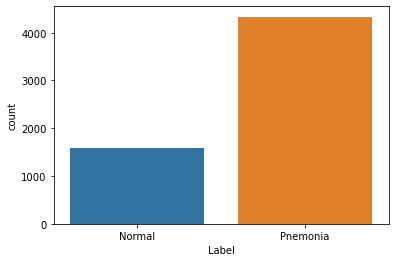

In [9]:
sns.countplot(x=data['Label'])

<AxesSubplot:xlabel='Label_2_Virus_category', ylabel='count'>

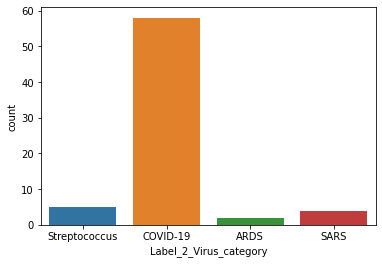

In [10]:
sns.countplot(x=data['Label_2_Virus_category'])

Since I will be trying to detect COVID from X-Rays, I will label the other pnuemonia virus as just pnuemonia. Since during the pandemic, COVID-19 will be much more prelavent in the society.

Hence the images will have 3 classes. First, X_ray images of normal lungs. Second, X_ray images of lungs with Pnuemonia. Thirdly, X_ray images of lungs infected with COVID-19.

###### Data Preprocessing

In [52]:
Train_normal= list(data[(data['Dataset_type']=='TRAIN')&(data['Label']=='Normal')]['X_ray_image_name'])

In [53]:
Train_covid=list(data[(data['Dataset_type']=='TRAIN')&(data['Label_2_Virus_category']=='COVID-19')]['X_ray_image_name'])

In [54]:
Train_pnuemonia=list(data[(data['Dataset_type']=='TRAIN')&(data['Label']=='Pnemonia')&(data['Label_2_Virus_category']!='COVID-19')]['X_ray_image_name'])

In [14]:
data['Dataset_type'].value_counts()

TRAIN    5286
TEST      624
Name: Dataset_type, dtype: int64

In [15]:
len(Train_normal)+len(Train_covid)+len(Train_pnuemonia)

5286

We have correctly seperated our train data into 3 separate classes.

In [55]:
Test_normal= list(data[(data['Dataset_type']=='TEST')&(data['Label']=='Normal')]['X_ray_image_name'])

In [56]:
Test_covid=list(data[(data['Dataset_type']=='TEST')&(data['Label_2_Virus_category']=='COVID-19')]['X_ray_image_name'])

In [57]:
Test_pnuemonia=list(data[(data['Dataset_type']=='TEST')&(data['Label']=='Pnemonia')&(data['Label_2_Virus_category']!='COVID-19')]['X_ray_image_name'])

In [19]:
len(Test_normal)+len(Test_covid)+len(Test_pnuemonia)

624

Our train data and test data list has been prepared, now we move the images to respective folders.

In [20]:
import shutil
for i in Train_normal:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}".format(i)
    target = r"archive (5)/Train/Normal"
    shutil.move(original,target)

In [21]:
for i in Train_pnuemonia:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}".format(i)
    target = r"archive (5)/Train/Pneumonia"
    shutil.move(original,target)

In [22]:
for i in Train_covid:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/{}".format(i)
    target = r"archive (5)/Train/Covid"
    shutil.move(original,target)

Now we move the Test data into the respective folders

In [24]:
for i in Test_normal:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/{}".format(i)
    target = r"archive (5)/Test/Normal"
    shutil.move(original,target)

for i in Test_pnuemonia:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/{}".format(i)
    target = r"archive (5)/Test/Pneumonia"
    shutil.move(original,target)
    
for i in Test_covid:
    original = r"archive (5)/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/{}".format(i)
    target = r"archive (5)/Test/Covid"
    shutil.move(original,target)

In [9]:
import cv2
img = cv2.imread("archive (5)/Train/Normal/IM-0195-0001.JPEG")
img.shape

(1546, 1774, 3)

In [30]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory("archive (5)/Train",class_mode='categorical',target_size=(150,150))

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("archive (5)/Test",batch_size=32,class_mode='categorical',target_size=(150,150))


Found 5286 images belonging to 3 classes.
Found 632 images belonging to 3 classes.


In [31]:
for i in training_set[0]:
    print(i.shape)

(32, 64, 64, 3)
(32, 3)


In [67]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.models import Model


cnn = tf.keras.models.Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

cnn.add(BatchNormalization())

cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))

cnn.add(BatchNormalization())

cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(units=3,activation='softmax'))

In [68]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6272)            

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, validation_data = test_set, epochs = 100,callbacks=[early_stop],verbose=1)

Epoch 1/100
166/166 [==============================] - 70s 420ms/step - loss: 1.0104 - accuracy: 0.7334 - val_loss: 4.9629 - val_accuracy: 0.6171
Epoch 2/100
156/166 [===========================>..] - ETA: 3s - loss: 0.4496 - accuracy: 0.8366

KeyboardInterrupt: 

In [35]:
cnn.save('X-Ray Predictor.h5')

<AxesSubplot:>

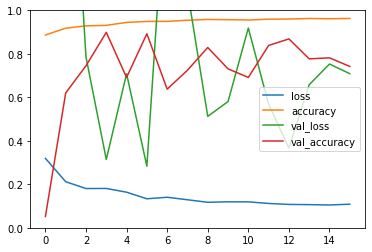

In [45]:
model_loss = pd.DataFrame(cnn.history.history)
model_loss.plot(ylim=(0,1))

In [61]:
from sklearn.metrics import confusion_matrix
import itertools


p_test = cnn.predict(test_set).argmax(axis=1)

print(confusion_matrix(test_set.classes,p_test))

[[  0   5   3]
 [  0 144  90]
 [  1 238 151]]


In [60]:
test_set.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test_set.labels,p_test))
print('\n')
print(classification_report(test_set.labels,p_test,target_names=test_set.class_indices))
print('\n')


[[  0   5   3]
 [  0 144  90]
 [  1 238 151]]


              precision    recall  f1-score   support

       Covid       0.00      0.00      0.00         8
      Normal       0.37      0.62      0.46       234
   Pneumonia       0.62      0.39      0.48       390

    accuracy                           0.47       632
   macro avg       0.33      0.33      0.31       632
weighted avg       0.52      0.47      0.47       632



